In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
df = pd.read_excel('/content/drive/MyDrive/Data_con.xlsx', index_col=[0], parse_dates=[0])
df.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


In [65]:
df.describe()

,Monthly beer production
count,476.000000
mean,136.395378
std,33.738725
min,64.800000
25%,112.900000
50%,139.150000
75%,158.825000
max,217.800000


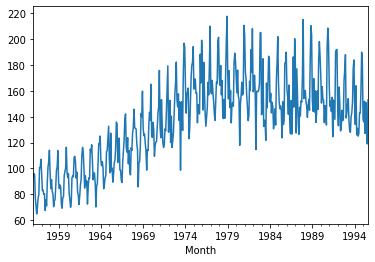

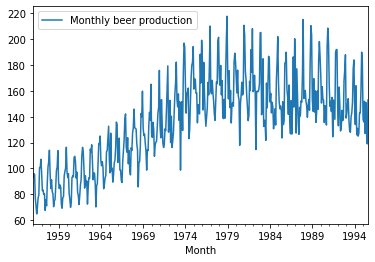

In [130]:
df1 = np.log(df['Monthly beer production']) # equivalent
np.exp(df1).plot()
df.plot()

In [126]:
prod_train = df1[0:430]
prod_test = df1[430:]

In [127]:
prod_model = ARIMA(prod_train, order=(2, 0, 5))

prod_model_fit = prod_model.fit()
prod_forecast = prod_model_fit.forecast(steps = 46)[0]
prod_forecast

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


array([5.15269984, 5.11829004, 5.10874332, 5.03632045, 5.03957589,
       5.04131651, 5.0420708 , 5.04218347, 5.04187931, 5.04130491,
       5.0405559 , 5.03969461, 5.03876171, 5.0377837 , 5.03677786,
       5.03575546, 5.03472384, 5.03368777, 5.03265037, 5.03161366,
       5.03057896, 5.0295471 , 5.02851865, 5.02749394, 5.0264732 ,
       5.02545657, 5.02444413, 5.02343593, 5.022432  , 5.02143234,
       5.02043695, 5.01944584, 5.01845897, 5.01747636, 5.01649797,
       5.01552379, 5.01455381, 5.01358801, 5.01262637, 5.01166888,
       5.01071551, 5.00976625, 5.00882108, 5.00787998, 5.00694294,
       5.00600994])

In [133]:
rmse = np.sqrt(mean_squared_error(np.exp(prod_test), np.exp(prod_forecast)))
rmse

19.26852436448164

In [87]:
from statsmodels.tsa.stattools import adfuller

t_stat, p_value, _, _, critical_values, _  = adfuller(df1.values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
print(f'p-value: {p_value:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')

ADF Statistic: -2.80
p-value: 0.06
Critial Values:
   1%, -3.44
Critial Values:
   5%, -2.87
Critial Values:
   10%, -2.57
